In [ ]:
###IMPORTING LIBRARIES

In [ ]:
!pip install matplotlib
!pip install plotly.express

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
import plotly.express as px

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [ ]:
###DATA PRE_EXAMINATION

In [ ]:
##Data Upload

In [492]:
Netflix_data = pd.read_csv("NetflixOriginals.csv", encoding="ISO-8859-1")
Netflix_copy = Netflix_data.copy()
Netflix_data

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi
...,...,...,...,...,...,...
579,Taylor Swift: Reputation Stadium Tour,Concert Film,"December 31, 2018",125,8.4,English
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,"October 9, 2015",91,8.4,English/Ukranian/Russian
581,Springsteen on Broadway,One-man show,"December 16, 2018",153,8.5,English
582,Emicida: AmarElo - It's All For Yesterday,Documentary,"December 8, 2020",89,8.6,Portuguese


In [ ]:
##Data Info

In [493]:
Netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       584 non-null    object 
 1   Genre       584 non-null    object 
 2   Premiere    584 non-null    object 
 3   Runtime     584 non-null    int64  
 4   IMDB Score  584 non-null    float64
 5   Language    584 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 27.5+ KB


In [ ]:
Netflix_data.isnull().sum()

Title         0
Genre         0
Premiere      0
Runtime       0
IMDB Score    0
Language      0
dtype: int64

In [ ]:
###DATA ANALYSIS

In [ ]:
##In which language were the long-running films created according to the dataset? Make a visualization.

                      Language     Runtime
0                 English/Akan  136.000000
1         Khmer/English/French  136.000000
2                      Marathi  121.666667
3               English/Korean  121.000000
4              Spanish/Catalan  116.000000
5                       Korean  115.833333
6                        Hindi  115.787879
7               English/Arabic  114.000000
8                   Indonesian  103.777778
9                      Turkish  101.800000
10                       Malay  101.000000
11                       Tamil  101.000000
12                        Thai  101.000000
13                       Dutch   99.666667
14                      German   99.600000
15                    Filipino   99.500000
16                    Japanese   99.333333
17                      Polish   98.666667
18                     Italian   98.357143
19             Spanish/English   96.000000
20                     Spanish   93.387097
21                      French   92.700000
22         

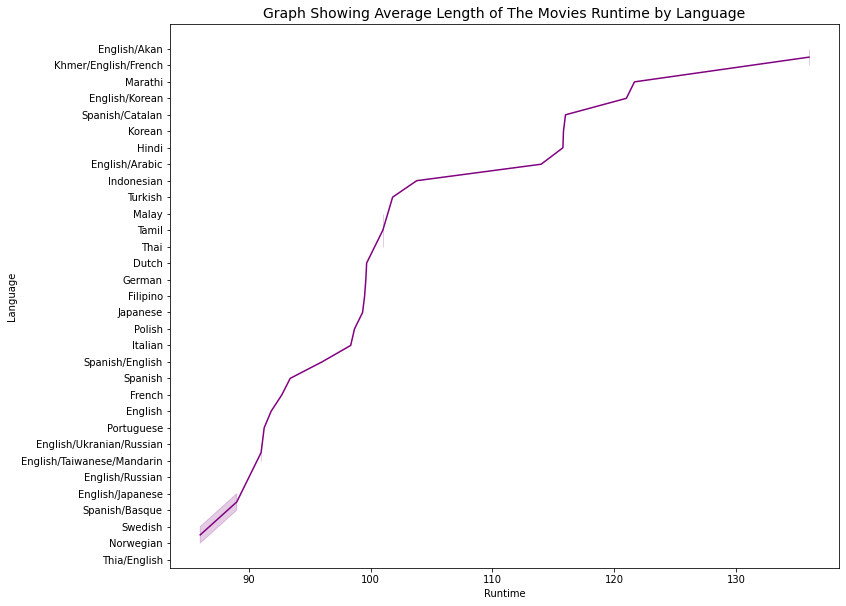

In [ ]:
Netflix_data.groupby("Language").agg({"Runtime": "mean"}).sort_values(by="Runtime", ascending=False)
Netflix_data.groupby("Language").agg({"Runtime": "mean"}).sort_values(by="Runtime", ascending=False)
Runtime_sort = Netflix_data.groupby("Language").agg({"Runtime": "mean"}).sort_values(by="Runtime", ascending=False).reset_index()
print(Runtime_sort)

plt.figure(figsize = (12,10))
plt.title("Graph Showing Average Length of The Movies Runtime by Language",fontsize=14)
sns.lineplot(y=Runtime_sort["Language"], x=Runtime_sort.loc[(Runtime_sort["Runtime"] >= 86)]["Runtime"], color="purple")

In [ ]:
##Object to Date Format

In [ ]:
Netflix_data["Premiere"] = pd.to_datetime(Netflix_data["Premiere"])
print(Netflix_data.dtypes)

Title                 object
Genre                 object
Premiere      datetime64[ns]
Runtime                int64
IMDB Score           float64
Language              object
dtype: object


In [ ]:
##Find and visualize the IMDB values ​​of the movies shot in the 'Documentary' genre between January 2019 and June 2020.

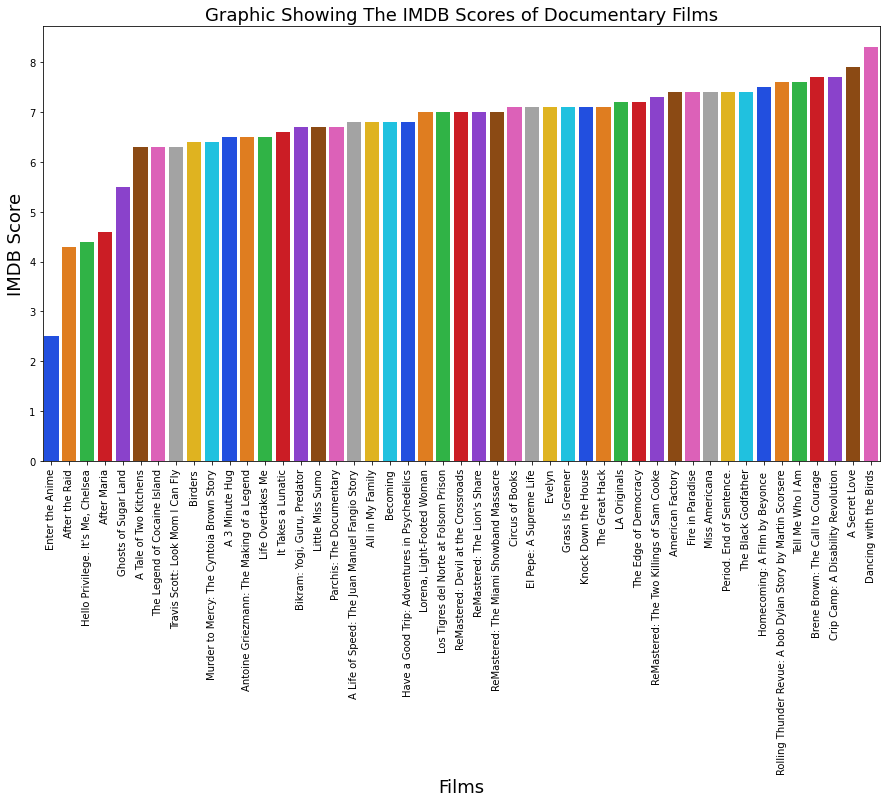

In [ ]:
DateSort = Netflix_data.loc[(Netflix_data["Genre"] == "Documentary") & (Netflix_data["Premiere"] > "2019-01-31") & (Netflix_data["Premiere"] < "2020-06-01")]
fig, ax = plt.subplots(figsize=(15,8))
rotation = sns.barplot(data = DateSort , 
                       x="Title",
                       y="IMDB Score",
                       ax=ax,
                       palette="bright")
for item in rotation.get_xticklabels():
    item.set_rotation(90)

plt.title("Graphic Showing The IMDB Scores of Documentary Films", fontsize=18)
plt.xlabel("Films", fontsize=18)
plt.ylabel("IMDB Score", fontsize=18)
plt.show()

In [ ]:
##Which genre has the highest IMDB rating among movies shot in English?

In [ ]:
English_score = (Netflix_data['Language'] =='English')
Netflix_data[English_score].sort_values("IMDB Score", ascending=False).head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language
583,David Attenborough: A Life on Our Planet,Documentary,2020-10-04,83,9.0,English
581,Springsteen on Broadway,One-man show,2018-12-16,153,8.5,English
579,Taylor Swift: Reputation Stadium Tour,Concert Film,2018-12-31,125,8.4,English
578,Ben Platt: Live from Radio City Music Hall,Concert Film,2020-05-20,85,8.4,English
577,Dancing with the Birds,Documentary,2019-10-23,51,8.3,English


In [ ]:
HighImdbIndex = Netflix_data[Netflix_data["Language"] == 'English']["IMDB Score"].idxmax()
HighIMDB = list(Netflix_data.iloc[HighImdbIndex:HighImdbIndex+1,]["IMDB Score"])[0]
HighIMDBGenre = list(Netflix_data.iloc[HighImdbIndex:HighImdbIndex+1,]["Genre"])[0]
HighIMDBTitle = list(Netflix_data.iloc[HighImdbIndex:HighImdbIndex+1,]["Title"])[0]
print("""The Genre of The Movie {} is {} and has IMDB score ({}).""".format(HighIMDBTitle,HighIMDBGenre,HighIMDB))

The Genre of The Movie David Attenborough: A Life on Our Planet is Documentary and has IMDB score (9.0).


In [ ]:
##What is the average 'runtime' of movies shot in 'Hindi'?

In [ ]:
print("Average Length of Movies Filmed in Hindi : {}."
      .format(Netflix_data[Netflix_data["Language"] == "Hindi"]["Runtime"].mean()))

Average Length of Movies Filmed in Hindi : 115.78787878787878.


In [ ]:
##How many categories does the 'Genre' column have? What are these categories? Express it visually.

In [ ]:
Netflix_data.Genre.nunique()

115

In [ ]:
Netflix_data.Genre.unique()

array(['Documentary', 'Thriller', 'Science fiction/Drama',
       'Horror thriller', 'Mystery', 'Action', 'Comedy',
       'Heist film/Thriller', 'Musical/Western/Fantasy', 'Drama',
       'Romantic comedy', 'Action comedy', 'Horror anthology',
       'Political thriller', 'Superhero-Comedy', 'Horror',
       'Romance drama', 'Anime / Short', 'Superhero', 'Heist', 'Western',
       'Animation/Superhero', 'Family film', 'Action-thriller',
       'Teen comedy-drama', 'Romantic drama', 'Animation',
       'Aftershow / Interview', 'Christmas musical',
       'Science fiction adventure', 'Science fiction', 'Variety show',
       'Comedy-drama', 'Comedy/Fantasy/Family', 'Supernatural drama',
       'Action/Comedy', 'Action/Science fiction',
       'Romantic teenage drama', 'Comedy / Musical', 'Musical',
       'Science fiction/Mystery', 'Crime drama',
       'Psychological thriller drama', 'Adventure/Comedy', 'Black comedy',
       'Romance', 'Horror comedy', 'Christian musical',
       'Rom

It has 115 categories.


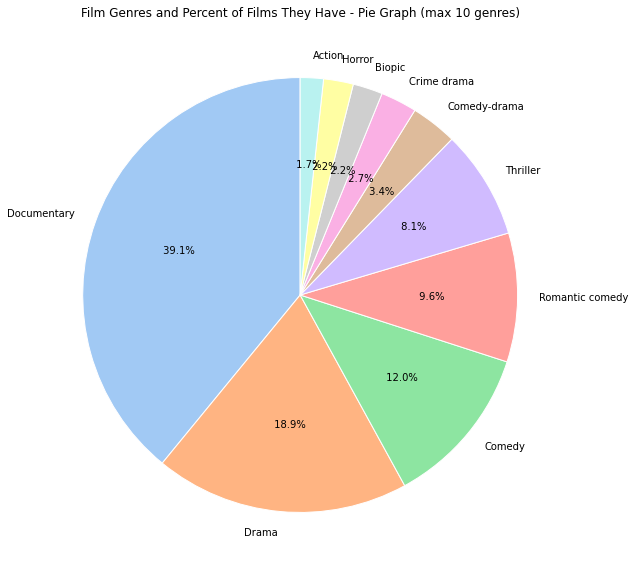

Text(0.5, 1.0, 'Film Genres and Percent of Films They Have - Bar Graph')

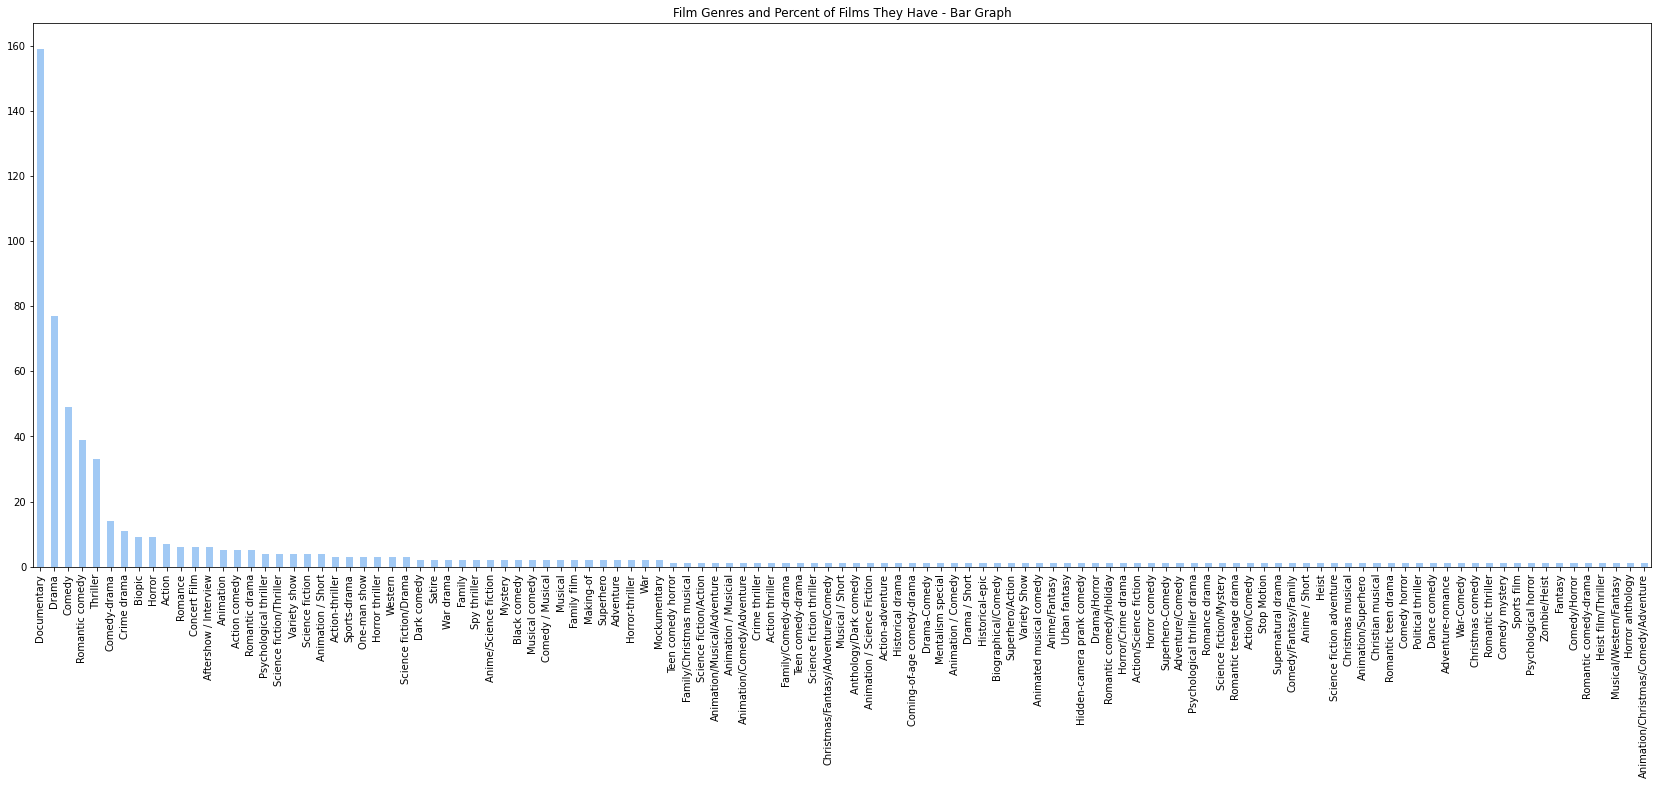

In [ ]:
Genre_dict = dict(Netflix_data["Genre"].value_counts())
print(f"It has {len(Genre_dict)} categories." )

plt.figure(figsize=(15,10))
plt.pie(list(Genre_dict.values())[:10], labels = list(Genre_dict.keys())[:10],autopct=' %.1f%%', startangle=90,
         wedgeprops={'linewidth': 1.0, 'edgecolor': 'white'},
       )
plt.title("Film Genres and Percent of Films They Have - Pie Graph (max 10 genres)")
plt.show()

plt.figure(figsize = (29,10))
Netflix_data.Genre.value_counts().plot(kind='bar')
plt.title("Film Genres and Percent of Films They Have - Bar Graph")

In [ ]:
##Find the 3 most used languages ​​in the movies in the data set.

In [ ]:
Netflix_data['Language'].value_counts().head(3)

English    401
Hindi       33
Spanish     31
Name: Language, dtype: int64

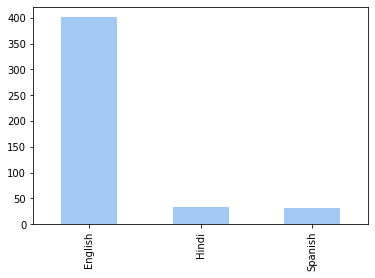

In [ ]:
Top3Lan = Netflix_data['Language'].value_counts()[0:3]
Top3Lan.plot(kind='bar')

In [ ]:
##What are the top 10 movies with the highest IMDB rating?

In [ ]:
Top10IMDB = Netflix_data.sort_values('IMDB Score', ascending=False)
Top10IMDB.head(10)
print("Top 10 Movies With The Highest IMDB Rating:\n{}".format(Netflix_data[["IMDB Score","Title"]].sort_values(by="IMDB Score",ascending=False, ignore_index=True).head(10)))

Top 10 Movies With The Highest IMDB Rating:
   IMDB Score                                        Title
0         9.0     David Attenborough: A Life on Our Planet
1         8.6    Emicida: AmarElo - It's All For Yesterday
2         8.5                      Springsteen on Broadway
3         8.4  Winter on Fire: Ukraine's Fight for Freedom
4         8.4        Taylor Swift: Reputation Stadium Tour
5         8.4   Ben Platt: Live from Radio City Music Hall
6         8.3                       Dancing with the Birds
7         8.3                      Cuba and the Cameraman 
8         8.2                                        Klaus
9         8.2                                         13th


In [ ]:
##What is the correlation between IMDB score and 'Runtime'? Examine and visualize.

In [ ]:
Netflix_data[["Runtime", "IMDB Score"]].corr()

,Runtime,IMDB Score
Runtime,1.000000,-0.040896
IMDB Score,-0.040896,1.000000


When the relationship between runtime and IMDB scores is examined, no correlation is seen. Correlation Table: 
            IMDB Score   Runtime
IMDB Score    1.000000 -0.040896
Runtime      -0.040896  1.000000


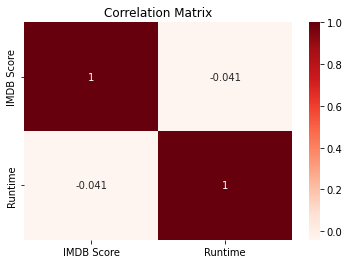

In [ ]:
cor1 = Netflix_data[["IMDB Score","Runtime"]]
print("When the relationship between runtime and IMDB scores is examined, no correlation is seen. Correlation Table: \n{}".format(cor.corr()))

plt.title('Correlation Matrix')
sns.heatmap(Netflix_data[['IMDB Score', 'Runtime']].corr(), annot=True, cmap=plt.cm.Reds)

fig = px.scatter(data_frame=Netflix_data, x="IMDB Score", y="Runtime")
fig.show()

In [ ]:
##Which are the top 10 'Genre' with the highest IMDB Score? Visualize it.

In [ ]:
Top10Genre =Netflix_data[["Title","Genre","Premiere","Runtime","IMDB Score","Language"]].sort_values(["IMDB Score"], ascending=False)[:10]
Top10Genre

,Title,Genre,Premiere,Runtime,IMDB Score,Language
583,David Attenborough: A Life on Our Planet,Documentary,2020-10-04,83,9.0,English
582,Emicida: AmarElo - It's All For Yesterday,Documentary,2020-12-08,89,8.6,Portuguese
581,Springsteen on Broadway,One-man show,2018-12-16,153,8.5,English
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,2015-10-09,91,8.4,English/Ukranian/Russian
579,Taylor Swift: Reputation Stadium Tour,Concert Film,2018-12-31,125,8.4,English
578,Ben Platt: Live from Radio City Music Hall,Concert Film,2020-05-20,85,8.4,English
577,Dancing with the Birds,Documentary,2019-10-23,51,8.3,English
576,Cuba and the Cameraman,Documentary,2017-11-24,114,8.3,English
573,Klaus,Animation/Christmas/Comedy/Adventure,2019-11-15,97,8.2,English
571,13th,Documentary,2016-10-07,100,8.2,English


In [ ]:
fig = px.scatter(Top10Genre, y= 'Genre', x='IMDB Score', hover_data = Top10Genre[['Genre','Premiere','Language']], color='Genre', 
                 title = "Top 10 High Rated Genre")
fig.show()

In [ ]:
##What are the top 10 movies with the highest 'Runtime'? Visualize it.

In [ ]:
Top10Runtime = Netflix_data[["Title","Genre","Premiere","Runtime","IMDB Score","Language"]].sort_values(["Runtime"], ascending=False)[:10]
Top10Runtime

,Title,Genre,Premiere,Runtime,IMDB Score,Language
561,The Irishman,Crime drama,2019-11-27,209,7.8,English
328,Da 5 Bloods,War drama,2020-06-12,155,6.5,English
581,Springsteen on Broadway,One-man show,2018-12-16,153,8.5,English
247,Citation,Drama,2020-11-06,151,6.2,English
284,The Forest of Love,Drama,2019-10-11,151,6.3,Japanese
509,Raat Akeli Hai,Thriller,2020-07-31,149,7.3,Hindi
7,The Last Days of American Crime,Heist film/Thriller,2020-06-05,149,3.7,English
543,Ludo,Anthology/Dark comedy,2020-11-12,149,7.6,Hindi
194,Army of the Dead,Zombie/Heist,2021-05-21,148,5.9,English
5,Drive,Action,2019-11-01,147,3.5,Hindi


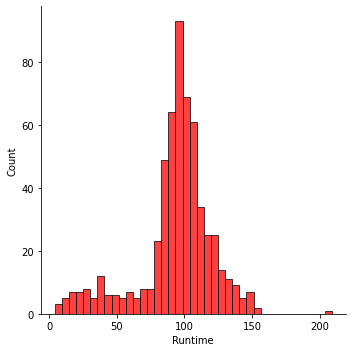

In [ ]:
sns.displot(Netflix_data['Runtime'], color='red')

In [ ]:
fig = px.scatter(Top10Runtime, y= 'Title', x='Runtime', hover_data = Top10Runtime[['Genre','Premiere','Language']], color='Genre', 
                 title = "Top 10 High Rated Programs")
fig.show()

In [ ]:
##In which year was the most movies released? Visualize it.

The most movies were released in 2020..
Number of movies released: 183


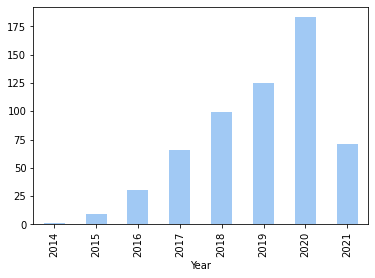

In [ ]:
Netflix_copy["Year"] = Netflix_copy["Premiere"].apply(lambda x: "".join(x for x in x.replace(",","").split()[-1]))
print("The most movies were released in {}..\nNumber of movies released: {}"
      .format(Netflix_copy["Year"].value_counts().idxmax(),Netflix_copy["Year"].value_counts().max()))

Netflix_copy.groupby("Year")["Title"].count().plot(kind="bar")
plt.show()

In [ ]:
##Which language movies have the lowest average IMBD ratings? Visualize it.

In [ ]:
Netflix_data.groupby("Language").agg({"IMDB Score" : "mean"}).sort_values(by = "IMDB Score").head().reset_index()

,Language,IMDB Score
0,Malay,4.200000
1,English/Japanese,4.400000
2,Norwegian,5.100000
3,Filipino,5.100000
4,Polish,5.166667


The language and IMDB score of the movie with the lowest average IMDB score: 
          IMDB Score
Language            
Malay            4.2


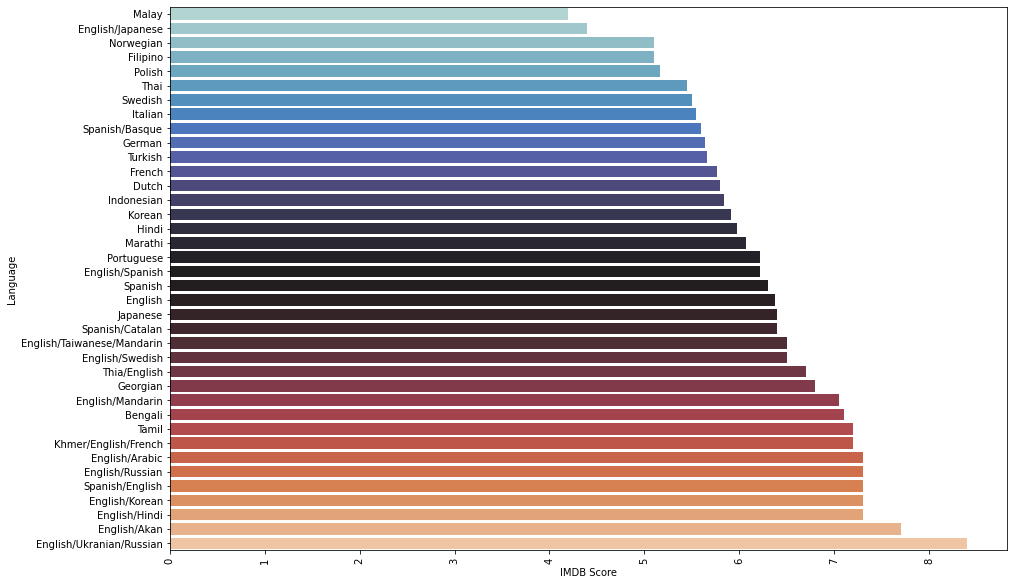

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
plt.xticks(rotation=90)
sns.barplot(y="Language", x="IMDB Score", palette = "icefire", data=Netflix_data.groupby("Language").agg({"IMDB Score" : "mean"}).sort_values(by = "IMDB Score").reset_index())
print("The language and IMDB score of the movie with the lowest average IMDB score: \n{0}".format(Netflix_data[["IMDB Score","Language"]].groupby("Language").mean().sort_values(by="IMDB Score",ascending=True).head(1)))

In [ ]:
##Which year has the greatest total runtime?

In [ ]:
SumRuntime = Netflix_copy[["Runtime","Year"]].groupby("Year").sum()
SumRuntime

,Runtime
Year,
2014,81
2015,814
2016,2766
2017,6129
2018,9405
2019,10856
2020,17384
2021,7214


Maximum total runtime (17384) in 2020 


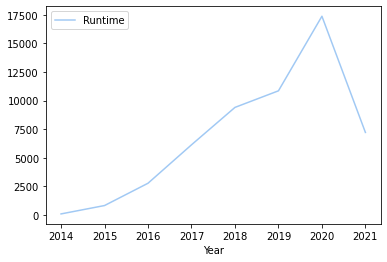

In [ ]:
print("Maximum total runtime ({}) in {} "
      .format(list(SumRuntime.max())[-1],list(SumRuntime.idxmax())[-1]))
SumRuntime.plot(kind="line")

In [ ]:
##What is the "Genre" where each language is used the most?

In [ ]:
print("Most streamed genres by language of productions on Netflix: \n{0}".format(Netflix_data[["Language","Genre"]].groupby("Language").max()))

Most streamed genres by language of productions on Netflix: 
                                                   Genre
Language                                                
Bengali                                      Documentary
Dutch                                    Romantic comedy
English                                     Zombie/Heist
English/Akan                                   War drama
English/Arabic                               Documentary
English/Hindi                                Documentary
English/Japanese                             Documentary
English/Korean                          Action-adventure
English/Mandarin                             Documentary
English/Russian                              Documentary
English/Spanish                              Documentary
English/Swedish                              Documentary
English/Taiwanese/Mandarin                         Drama
English/Ukranian/Russian                     Documentary
Filipino                   

In [ ]:
##Is there any outlier data in the data set? Please explain.

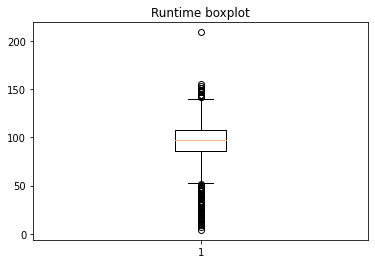

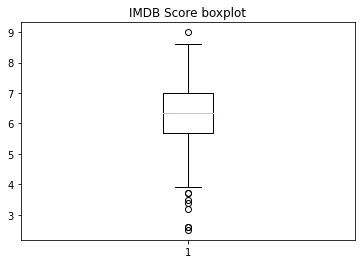

Conclusion: According to the boxplot, we see that there are outliers represented by dots out of the box for both variables.


In [ ]:
plt.boxplot(Netflix_data["Runtime"])
plt.title("Runtime boxplot")
plt.show()

plt.boxplot(Netflix_data["IMDB Score"])
plt.title("IMDB Score boxplot")
plt.show()

print("Conclusion: According to the boxplot, we see that there are outliers represented by dots out of the box for both variables.")

In [ ]:
##Quarterly Span (IQR) Analysis

In [ ]:
Netflix_data[['IMDB Score', 'Runtime']].describe()

,IMDB Score,Runtime
count,584.000000,584.000000
mean,6.271747,93.577055
std,0.979256,27.761683
min,2.500000,4.000000
25%,5.700000,86.000000
50%,6.350000,97.000000
75%,7.000000,108.000000
max,9.000000,209.000000


In [ ]:
print("We can examine the distribution of outliers from the histogram graph.")
imdb_q1 = Netflix_data["IMDB Score"].quantile(0.25)
imdb_q3 = Netflix_data["IMDB Score"].quantile(0.75)

imdb_iqr = imdb_q3-imdb_q1

imdb_up = imdb_q3 + 1.5 * imdb_iqr
imdb_low = imdb_q1 - 1.5 * imdb_iqr

outlier_imdb = Netflix_data[(Netflix_data["IMDB Score"] < imdb_low) | (Netflix_data["IMDB Score"] > imdb_up)]

print(f"IMDB outlier count: {outlier_imdb.count()[1]}")

q1_runtime = Netflix_data["Runtime"].quantile(0.25)
q3_runtime = Netflix_data["Runtime"].quantile(0.75)

iqr_runtime = q3_runtime - q1_runtime

up_runtime = q3_runtime + 1.5 * iqr_runtime
low_runtime = q1_runtime - 1.5 *iqr_runtime

outlier_runtime = Netflix_data[(Netflix_data["Runtime"] < low_runtime) | (Netflix_data["Runtime"] > up_runtime)]
runtime_count = outlier_runtime.count()["Runtime"]

print(f"Runtime outlier count: {runtime_count} ")

print("Conculusion:According to the Span of Quarter (IQR) method, which is more resistant to outliers, we can observe more discrete values ​​outside the normal distribution in the Runtime value.")

fig = px.histogram(Netflix_data, x="IMDB Score", marginal="box", opacity = 0.6, color_discrete_sequence=['indianred'])
fig.show()

fig = px.histogram(Netflix_data, x="Runtime", marginal="box", opacity = 0.6, color_discrete_sequence=['indianred'])
fig.show()

We can examine the distribution of outliers from the histogram graph.
IMDB outlier count: 9
Runtime outlier count: 75 
Conculution:According to the Span of Quarter (IQR) method, which is more resistant to outliers, we can observe more discrete values ​​outside the normal distribution in the Runtime value.
